 =====================================
# 1. Setup Environment
=====================================

In [6]:
!pip install fastapi uvicorn pyngrok nest_asyncio

import os, nest_asyncio, threading
import uvicorn
from pyngrok import ngrok

# Apply async patch (needed for Colab)
nest_asyncio.apply()



=====================================
# 2. Clone Your Repo + Move into Folder
=====================================


In [7]:
!git clone https://github.com/RG-BCS/generative-adversarial-networks.git
%cd generative-adversarial-networks/cgan-mnist-digit

# List contents (sanity check)
!ls -lh


Cloning into 'generative-adversarial-networks'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 239 (delta 80), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (239/239), 32.79 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/generative-adversarial-networks/cgan-mnist-digit/generative-adversarial-networks/cgan-mnist-digit
total 7.2M
-rw-r--r-- 1 root root 385K Aug 24 00:36 class_2.png
-rw-r--r-- 1 root root 304K Aug 24 00:36 class_4.png
-rw-r--r-- 1 root root 375K Aug 24 00:36 class_5.png
-rw-r--r-- 1 root root 405K Aug 24 00:36 class_8.png
-rw-r--r-- 1 root root 6.6K Aug 24 00:36 demo.ipynb
-rw-r--r-- 1 root root 3.4K Aug 24 00:36 demo_script.py
-rw-r--r-- 1 root root 333K Aug 24 00:36 discriminator.keras
-rw-r--r-- 1 root root 330K Aug 24 00:36 embed_disc.keras
-rw-r--r-- 1 root root  40K Aug 24 00:36 embed_gen.keras
-rw-r--r-- 1 root ro

=====================================
# 3. Start FastAPI Server with Ngrok
=====================================

In [9]:
from server import app   # import your FastAPI app

# Kill old ngrok sessions if any
ngrok.kill()

# Add your ngrok auth token (replace with your own!)
# get auth_token from this link: https://dashboard.ngrok.com/get-started/your-authtoken
#NGROK_AUTH_TOKEN = "YOUR_AUTHTOKEN_HERE"
NGROK_AUTH_TOKEN = "31fMlUWZiyDOEmOTwXLDDbAyPjw_831riCkXPrdn3FsVKYzSG"
!ngrok config add-authtoken $NGROK_AUTH_TOKEN

# Start tunnel
public_url = ngrok.connect(8000)
BASE_URL = public_url.public_url
print("Public API URL:", BASE_URL)

# Run uvicorn in background thread
def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

thread = threading.Thread(target=run, daemon=True)
thread.start()

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public API URL: https://ca61cf15f65b.ngrok-free.app


=====================================
# 4. Test Requests (Client Side)
=====================================

INFO:     35.229.17.65:0 - "POST /gen_images HTTP/1.1" 200 OK


INFO:     35.229.17.65:0 - "POST /gen_images HTTP/1.1" 200 OK


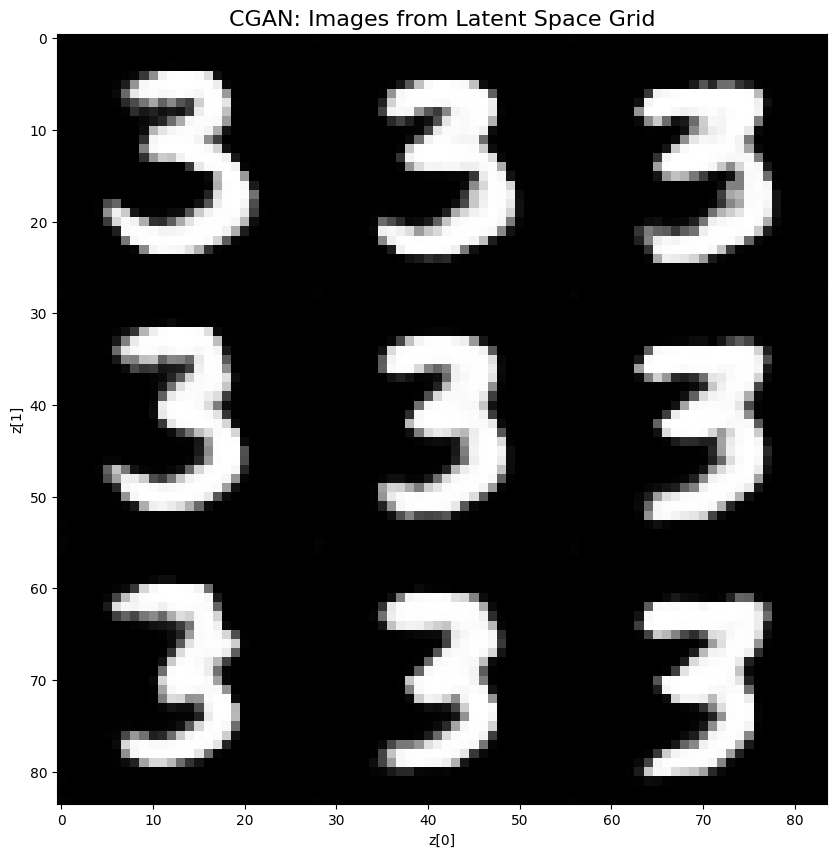

INFO:     35.229.17.65:0 - "POST /gen_images HTTP/1.1" 200 OK


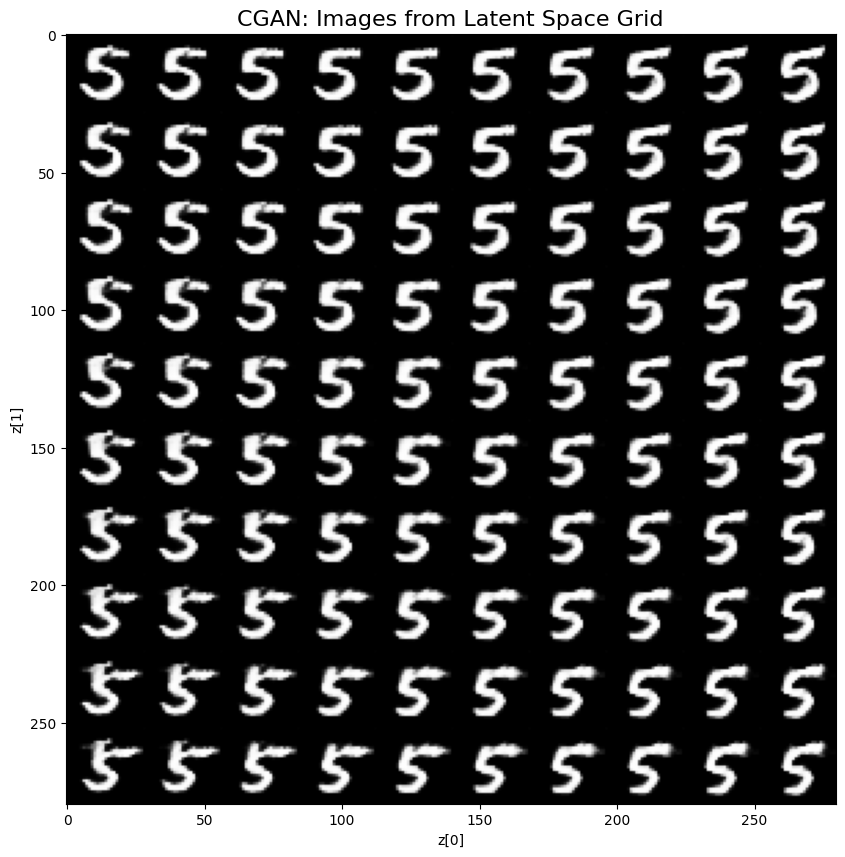

In [12]:
import requests
from IPython.display import Image, display

# ---- Single digit (e.g., 5) ----
resp = requests.post(f"{BASE_URL}/gen_images", json={"value": 9, "grid": False})
if resp.status_code == 200:
    open("digit.png", "wb").write(resp.content)
    display(Image("digit.png"))
else:
    print("Error:", resp.status_code, resp.text)

# ---- Grid of 3s ----
resp = requests.post(f"{BASE_URL}/gen_images", json={"value": 3, "grid": True,"grid_size":3})
if resp.status_code == 200:
    open("grid.png", "wb").write(resp.content)
    display(Image("grid.png"))
else:
    print("Error:", resp.status_code, resp.text)

# ---- Grid of 3s ----
resp = requests.post(f"{BASE_URL}/gen_images", json={"value": 5, "grid": True})
if resp.status_code == 200:
    open("grid.png", "wb").write(resp.content)
    display(Image("grid.png"))
else:
    print("Error:", resp.status_code, resp.text)
